# Data analysis with Jupyter Notebook, Pandas and Plotly
## PyLadiesBcn November meetup / PyDay 2018

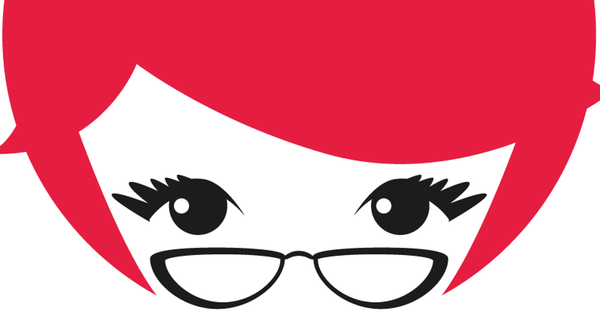

# 2. Introduction to Pandas

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

## Data structures

### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). By default, Pandas creates an integer **index** if nothing else is specified in the call:

In [2]:
series_of_numbers = pd.Series([1,2,3])
series_of_numbers

0    1
1    2
2    3
dtype: int64

In [3]:
series_of_words = pd.Series(['pandas','is','fun'])
series_of_words

0    pandas
1        is
2       fun
dtype: object

In [4]:
type(series_of_words)

pandas.core.series.Series

### DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. 

In [5]:
df = pd.DataFrame({'numbers':series_of_numbers,
                                'words':series_of_words,
                                'number_repeated' : 1,
                                'word_repeated' : 'foo',
                                'range' : range(4,7),
                                'time_series' : pd.date_range('20130102', periods=3),
                                'np_array' : np.array([3] * 3,dtype='int32'),
                                'categories' : pd.Categorical(["test","train","test"]),
                                })
           
df

,categories,np_array,number_repeated,numbers,range,time_series,word_repeated,words
0,test,3,1,1,4,2013-01-02,foo,pandas
1,train,3,1,2,5,2013-01-03,foo,is
2,test,3,1,3,6,2013-01-04,foo,fun


In [6]:
df.dtypes

categories               category
np_array                    int32
number_repeated             int64
numbers                     int64
range                       int64
time_series        datetime64[ns]
word_repeated              object
words                      object
dtype: object

In [7]:
type(df)

pandas.core.frame.DataFrame

## The Black Cards (aka Las Tarjetas Black)

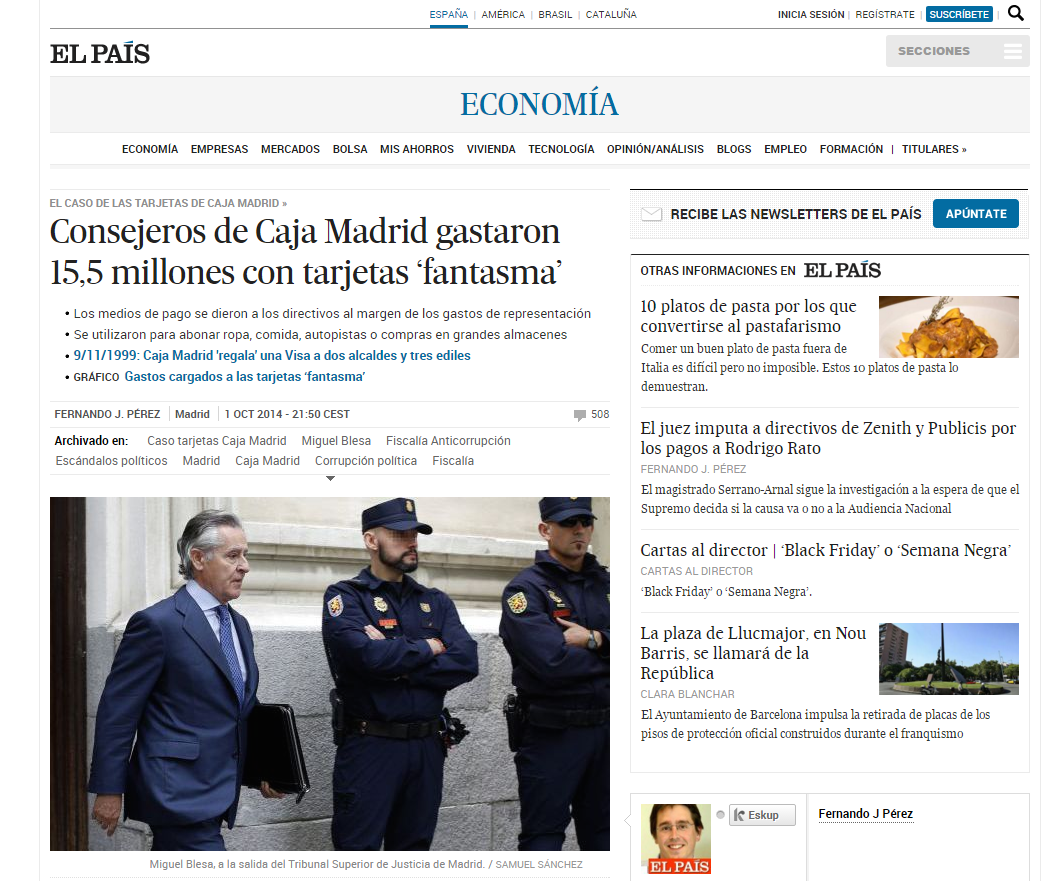

## Import data

In [8]:
df = pd.read_csv("tarjetas.csv")
type(df)

pandas.core.frame.DataFrame

## Viewing data

Display the size, columns, index, column types, values of the dataframe:

In [9]:
df.shape

(77202, 8)

In [10]:
df.index

RangeIndex(start=0, stop=77202, step=1)

In [11]:
df.columns

Index(['nombre', 'fecha', 'hora', 'minuto', 'importe', 'comercio',
       'actividad_completa', 'actividad'],
      dtype='object')

In [12]:
df.dtypes

nombre                 object
fecha                  object
hora                    int64
minuto                  int64
importe               float64
comercio               object
actividad_completa     object
actividad              object
dtype: object

In [13]:
df.values

array([['Alberto Recarte García Andrade', '2003-01-04', 12, ...,
        'RCG OFICINA                   ', 'CONFECCION TEXTIL EN GENERAL',
        'ROPA'],
       ['Alberto Recarte García Andrade', '2003-01-04', 12, ...,
        'MANZANIL AREA                 ',
        'HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST', 'HOTEL'],
       ['Alberto Recarte García Andrade', '2003-01-05', 19, ...,
        'REST REAL C GOLF SOTOGRAN     ', 'RESTAURANTES RESTO',
        'RESTAURANTE'],
       ...,
       ['Domingo Navalmoral Sánchez', '2005-02-18', 21, ...,
        '                              ', 'CAJEROS AUTOMATICOS', 'CA$H'],
       ['Domingo Navalmoral Sánchez', '2005-02-24', 21, ...,
        '                              ', 'CAJEROS AUTOMATICOS', 'CA$H'],
       ['Domingo Navalmoral Sánchez', '2005-03-04', 21, ...,
        '                              ', 'CAJEROS AUTOMATICOS', 'CA$H']],
      dtype=object)

Here is how to view the top and bottom rows of the frame:

In [14]:
df.head()

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
0,Alberto Recarte García Andrade,2003-01-04,12,30,38.700001,RCG OFICINA,CONFECCION TEXTIL EN GENERAL,ROPA
1,Alberto Recarte García Andrade,2003-01-04,12,32,14.600000,MANZANIL AREA,"HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST",HOTEL
2,Alberto Recarte García Andrade,2003-01-05,19,7,95.620003,REST REAL C GOLF SOTOGRAN,RESTAURANTES RESTO,RESTAURANTE
3,Alberto Recarte García Andrade,2003-01-08,15,31,49.130001,ESTACONES DE SERVICIO ML,GASOLINERAS,COCHE
4,Alberto Recarte García Andrade,2003-01-08,16,5,13.940000,NISA (H 24) VINHOLAN S.A.,GASOLINERAS,COCHE


In [15]:
df.tail(7)

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
77195,Domingo Navalmoral Sánchez,2005-01-28,21,10,300.000000,,CAJEROS AUTOMATICOS,CA$H
77196,Domingo Navalmoral Sánchez,2005-02-11,20,26,300.000000,,CAJEROS AUTOMATICOS,CA$H
77197,Domingo Navalmoral Sánchez,2005-02-11,21,7,129.979996,PC CITY S.SEBASTIAN REYES,"ELECTRODOMESTICOS,EQUIPOS ELECTRICOS",HOGAR
77198,Domingo Navalmoral Sánchez,2005-02-11,21,43,65.760002,MEDIA MARKT S SEBASTIAN REYES,CADENA MEDIA MARKT,COMPRA BIENES
77199,Domingo Navalmoral Sánchez,2005-02-18,21,7,300.000000,,CAJEROS AUTOMATICOS,CA$H
77200,Domingo Navalmoral Sánchez,2005-02-24,21,5,300.000000,,CAJEROS AUTOMATICOS,CA$H
77201,Domingo Navalmoral Sánchez,2005-03-04,21,18,300.000000,,CAJEROS AUTOMATICOS,CA$H


describe() shows a quick statistic summary of your data:

In [16]:
df.describe()

,hora,minuto,importe
count,77202.000000,77202.000000,77202.000000
mean,14.954056,29.629919,152.933509
std,4.458793,16.471701,399.742682
min,0.000000,0.000000,-11930.000000
25%,14.000000,16.000000,32.849998
50%,15.000000,30.000000,68.599998
75%,17.000000,43.000000,148.270000
max,23.000000,59.000000,16921.759766


## Selecting data

### Selecting by position

Selecting via [], which slices the rows.

In [17]:
df[:3]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
0,Alberto Recarte García Andrade,2003-01-04,12,30,38.700001,RCG OFICINA,CONFECCION TEXTIL EN GENERAL,ROPA
1,Alberto Recarte García Andrade,2003-01-04,12,32,14.600000,MANZANIL AREA,"HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST",HOTEL
2,Alberto Recarte García Andrade,2003-01-05,19,7,95.620003,REST REAL C GOLF SOTOGRAN,RESTAURANTES RESTO,RESTAURANTE


In [18]:
df.iloc[3:5,0:2]

,nombre,fecha
3,Alberto Recarte García Andrade,2003-01-08
4,Alberto Recarte García Andrade,2003-01-08


### Selecting by label

In [19]:
df[['nombre','importe']][:5]

,nombre,importe
0,Alberto Recarte García Andrade,38.700001
1,Alberto Recarte García Andrade,14.600000
2,Alberto Recarte García Andrade,95.620003
3,Alberto Recarte García Andrade,49.130001
4,Alberto Recarte García Andrade,13.940000


In [20]:
df.loc[125:130,['nombre','importe']]

,nombre,importe
125,Alberto Recarte García Andrade,2.450000
126,Alberto Recarte García Andrade,-4.320000
127,Alberto Recarte García Andrade,41.450001
128,Alberto Recarte García Andrade,68.400002
129,Alberto Recarte García Andrade,228.000000
130,Alberto Recarte García Andrade,68.400002


### Selecting by boolean indexing

In [21]:
df.actividad == "CASINO"

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
77172    False
77173    False
77174    False
77175    False
77176    False
77177    False
77178    False
77179    False
77180    False
77181    False
77182    False
77183    False
77184    False
77185    False
77186    False
77187    False
77188    False
77189    False
77190    False
77191    False
77192    False
77193    False
77194    False
77195    False
77196    False
77197    False
77198    False
77199    False
77200    False
77201    False
Name: actividad, Length: 77202, dtype: bool

In [22]:
df[df.actividad == "CASINO"]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
3354,Antonio Cámara Eguinoa,2005-03-09,15,25,20.459999,,CAESAR'S HOTEL AND CASINO,CASINO
3633,Antonio Cámara Eguinoa,2006-01-23,16,44,164.059998,ASOCIACION GRAN PENA,CASINOS,CASINO
4884,Antonio Cámara Eguinoa,2008-11-06,15,45,86.320000,ASOCIACION GRAN PENA,CASINOS,CASINO
5081,Antonio Cámara Eguinoa,2009-04-24,17,1,43.000000,ASOCIACION GRAN PENA,CASINOS,CASINO
5082,Antonio Cámara Eguinoa,2009-04-24,17,45,22.750000,ASOCIACION GRAN PENA,CASINOS,CASINO
5419,Antonio Cámara Eguinoa,2009-11-27,17,6,42.000000,ASOCIACION GRAN PENA,CASINOS,CASINO
5662,Antonio Cámara Eguinoa,2010-04-08,16,33,65.000000,ASOCIACION GRAN PENA,CASINOS,CASINO
12448,Rafael Eduardo Torres Posada,2006-01-02,20,25,34.099998,RUDA,APUESTAS,CASINO
19593,Gonzalo Martín Pascual,2008-12-26,17,53,59.900002,GAME GROUP,GAME GROUP,CASINO
23886,Javier de Miguel Sánchez,2009-01-02,13,43,172.350006,GAME GROUP,GAME GROUP,CASINO


How many expenses over 10k are there?

In [23]:
df[df.importe > 10000]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
52356,Ricardo Romero de Tejada y Picatoste,2007-11-26,10,59,11930.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
61981,Ildefonso José Sánchez Barcoj,2006-02-15,9,13,11000.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
63145,Ildefonso José Sánchez Barcoj,2009-12-31,2,40,16921.759766,VIAJES ECI,EL CORTE INGLES,COMPRA BIENES
64724,Miguel Blesa de la Parra,2006-04-05,16,51,12597.269531,VIAJES ECI,EL CORTE INGLES,COMPRA BIENES
64806,Miguel Blesa de la Parra,2006-07-20,14,50,13148.299805,VIAJES ECI,EL CORTE INGLES,COMPRA BIENES
66076,Ramón Ferraz Ricarte,2007-12-20,14,9,13549.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
66831,Matías Amat Roca,2006-12-27,17,6,15000.000000,TALLERES DE ARTE GRANDA,"MUEBLES,ANTIGUEDADES Y GALERIAS DE ARTE",HOGAR
67092,Matías Amat Roca,2008-11-12,12,16,10400.000000,VIAJES CATAI SA,AGENCIAS DE VIAJES,VIAJE
68699,Enrique de la Torre Martínez,2007-11-29,9,57,12000.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
68714,Enrique de la Torre Martínez,2008-03-07,16,1,11075.000000,EL CORTE INGLES,EL CORTE INGLES,COMPRA BIENES


You can add operators to join boolean expressions, such as:
- `&` and

| Selection | Result   |
|------|------|
|   True & True | True |
| True & False | False |
| False & False | False |

- `|` or 

| Selection | Result   |
|------|------|
|   True \| True | True |
| True \|  False | True |
| False \| False | False |

- `~` not

| Selection | Result   |
|------|------|
| ~ True | False |
| ~ False | True |



In [24]:
df[(df.fecha > '2009') & (df.importe > 1000)]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
1238,Alberto Recarte García Andrade,2009-09-19,11,9,1867.439941,HOTELERA SANCTI PETRI,"HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST",HOTEL
1298,Alberto Recarte García Andrade,2009-12-22,12,43,1800.000000,CASTELLANA GOLF,CLUBS DEPORTIVOS,DEPORTE
1299,Alberto Recarte García Andrade,2009-12-22,12,43,1400.000000,CASTELLANA GOLF,CLUBS DEPORTIVOS,DEPORTE
2662,Ángel Eugenio Gómez del Pulgar Perales,2009-03-03,18,2,1561.189941,COMERCIAL MERCEDES BENZ,AUTOM.Y MOTOCICLETAS ( VENTAS Y REPARAC),COCHE
2747,Ángel Eugenio Gómez del Pulgar Perales,2009-08-12,11,5,3290.000000,CONFORTEL CALAS DE CONIL,"HOTELES 4 Y 5 ESTRELLAS,BALNEARIOS,CAMPI",HOTEL
2823,Ángel Eugenio Gómez del Pulgar Perales,2009-12-23,20,0,1676.400024,VIAJES N L S L,AGENCIAS DE VIAJES,VIAJE
2884,Ángel Eugenio Gómez del Pulgar Perales,2010-03-29,19,21,3592.000000,VIAJES N L S L,AGENCIAS DE VIAJES,VIAJE
5274,Antonio Cámara Eguinoa,2009-08-14,14,25,1200.000000,MH020,CADENA MENAJE DEL HOGAR,COMPRA BIENES
7663,Antonio Rey de Viñas Sánchez-Majestad,2009-08-03,10,43,1052.400024,HOTEL LA FRANCA,"HOTELES 4 Y 5 ESTRELLAS,BALNEARIOS,CAMPI",HOTEL
7749,Antonio Rey de Viñas Sánchez-Majestad,2009-12-27,11,55,1399.000000,FNAC PARQUE SUR,FNAC,LIBRERIA


In [25]:
df[(df.importe <= 5) | (df.importe >= 1000)]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
9,Alberto Recarte García Andrade,2003-01-21,15,28,2.100000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
10,Alberto Recarte García Andrade,2003-01-21,15,28,3.100000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
11,Alberto Recarte García Andrade,2003-01-21,15,28,3.100000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
12,Alberto Recarte García Andrade,2003-01-21,15,28,2.100000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
13,Alberto Recarte García Andrade,2003-01-21,15,28,1.500000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
14,Alberto Recarte García Andrade,2003-01-21,15,28,1.500000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
39,Alberto Recarte García Andrade,2003-04-22,17,8,2.450000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
40,Alberto Recarte García Andrade,2003-04-22,17,8,5.000000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
41,Alberto Recarte García Andrade,2003-04-22,17,8,3.400000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE
43,Alberto Recarte García Andrade,2003-04-28,15,32,2.450000,AUTOPISTA DEL SOL,AUTOPISTAS (TERMINALES),COCHE


In [26]:
df[~(df.nombre.str.match('^Alberto'))]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
1357,Alejandro Couceiro Ojeda,2003-01-02,12,29,108.199997,OPTICA COTTET S A,FOTOGRAFIA NIVEL 4,IMAGEN
1358,Alejandro Couceiro Ojeda,2003-01-02,19,15,130.000000,DENIS JR.,CONFECCION TEXTIL NIVEL 2,ROPA
1359,Alejandro Couceiro Ojeda,2003-01-05,12,29,107.000000,BENETTON,CONFECCION TEXTIL NIVEL 2,ROPA
1360,Alejandro Couceiro Ojeda,2003-01-05,12,38,57.439999,B&amp;G,CONFECCION TEXTIL EN GENERAL,ROPA
1361,Alejandro Couceiro Ojeda,2003-01-05,19,7,115.000000,DIANA VIAJI S.A.,"JUGUETES, ARTICULOS DEPORTIVOS",COMPRA BIENES
1362,Alejandro Couceiro Ojeda,2003-01-05,19,7,923.000000,SONY-GALERY,"ELECTRODOMESTICOS,EQUIPOS ELECTRICOS",HOGAR
1363,Alejandro Couceiro Ojeda,2003-01-08,14,50,92.339996,EL CORTE INGLES,HIPERCOR SUPERMERCADOS EL CORTE INGLES,SUPERMERCADO
1364,Alejandro Couceiro Ojeda,2003-01-18,8,6,120.000000,STARTEL,VENTA DE EQUIPOS TELEFONICOS,TELECOM
1365,Alejandro Couceiro Ojeda,2003-02-07,15,20,48.619999,E.S. DR. ESQUERDO,GASOLINERAS,COCHE
1366,Alejandro Couceiro Ojeda,2003-02-09,12,57,46.939999,MALLORCA,"SUPERMERCADOS,ULTRAMARINOS, ECONOMATOS",SUPERMERCADO


### Sorting values

Let's sort the values by import decreasing

In [27]:
df.sort_values(by=['importe'], ascending=False)[:10]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
63145,Ildefonso José Sánchez Barcoj,2009-12-31,2,40,16921.759766,VIAJES ECI,EL CORTE INGLES,COMPRA BIENES
66831,Matías Amat Roca,2006-12-27,17,6,15000.000000,TALLERES DE ARTE GRANDA,"MUEBLES,ANTIGUEDADES Y GALERIAS DE ARTE",HOGAR
66076,Ramón Ferraz Ricarte,2007-12-20,14,9,13549.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
64806,Miguel Blesa de la Parra,2006-07-20,14,50,13148.299805,VIAJES ECI,EL CORTE INGLES,COMPRA BIENES
64724,Miguel Blesa de la Parra,2006-04-05,16,51,12597.269531,VIAJES ECI,EL CORTE INGLES,COMPRA BIENES
68699,Enrique de la Torre Martínez,2007-11-29,9,57,12000.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
52356,Ricardo Romero de Tejada y Picatoste,2007-11-26,10,59,11930.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
68714,Enrique de la Torre Martínez,2008-03-07,16,1,11075.000000,EL CORTE INGLES,EL CORTE INGLES,COMPRA BIENES
61981,Ildefonso José Sánchez Barcoj,2006-02-15,9,13,11000.000000,,AGENCIAS BANCARIAS(ANTICIPO VENTANILLA),BANCO
67092,Matías Amat Roca,2008-11-12,12,16,10400.000000,VIAJES CATAI SA,AGENCIAS DE VIAJES,VIAJE
